**STROKE PREDICTION USING ML**

In [ ]:
#This code is used to import the required libraries for prediction
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix, parallel_coordinates
import networkx as nx
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib as plt
import seaborn as sns

In [ ]:
#This code is used to read the stroke dataset
# The original file path was a local path (C:/Users/91944/Downloads/) which is not accessible in Colab.
# You need to upload the file to Colab's file system or mount Google Drive.

from google.colab import files
import io

# Option 1: Upload the file directly
# When you run this cell, a prompt will appear to select and upload your file.
print('Please upload the healthcare-dataset-stroke-data.csv file:')
uploaded = files.upload()

# Assuming the file is uploaded, you can then read it.
# You might need to adjust the filename if it's different after upload.
file_name = 'healthcare-dataset-stroke-data.csv'
if file_name in uploaded:
    stroke_df = pd.read_csv(io.BytesIO(uploaded[file_name]))
    print(f'Successfully loaded {file_name}.')
    print(stroke_df.head())
else:
    print(f'Error: {file_name} not found in uploaded files.')

# Option 2: If the file is in Google Drive, you can mount your Drive:
# from google.colab import drive
# drive.mount('/content/gdrive')
# stroke_df = pd.read_csv('/content/gdrive/My Drive/path/to/your/healthcare-dataset-stroke-data.csv')

# Option 3: If the file is already in the /content/sample_data directory (less likely for this file)
# stroke_df = pd.read_csv('/content/sample_data/healthcare-dataset-stroke-data.csv')

Please upload the healthcare-dataset-stroke-data.csv file:


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv
Successfully loaded healthcare-dataset-stroke-data.csv.
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smo

In [ ]:
#This code is used to print the top 5 rows
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**EDA**

In [ ]:
# This code is used to get the mean, standard deviation, minimum and maximum
# values
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#This code is used to print the data types
stroke_df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [ ]:
#This code is used to print the null values
stroke_df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


**Data Preprocessing(Data Cleaning)**

In [ ]:
#This code is used to fill the null values with median
stroke_df['bmi'] = stroke_df['bmi'].fillna(stroke_df['bmi'].median())
stroke_df['bmi']

,bmi
0,36.6
1,28.1
2,32.5
3,34.4
4,24.0
...,...
5105,28.1
5106,40.0
5107,30.6
5108,25.6


In [ ]:
stroke_df.isnull().sum().sum()

np.int64(0)

In [ ]:
#This code is to print to print unique values in the column
stroke_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
#This code is to print to print unique values in the column
stroke_df['gender'] = stroke_df['gender'].replace('Other', np.nan)
stroke_df['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
#This code is used to fill the unknown values in gender with mode
stroke_df['gender'] = stroke_df['gender'].fillna(stroke_df['gender'].mode()[0])
sorted(stroke_df['gender'].unique())

['Female', 'Male']

In [ ]:
#This code is used to print the number of characters in column
stroke_df['gender'].value_counts()

,count
gender,
Female,2995
Male,2115


In [ ]:
#This code is used to print the number of characters in column
#This code is used to replace unknown values with nan
stroke_df['smoking_status'] = stroke_df['smoking_status'].replace('Unknown', np.nan)
stroke_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', nan], dtype=object)

In [ ]:
#This code is used to fill the unknown values in smoking status with mode
stroke_df['smoking_status'] = stroke_df['smoking_status'].fillna(stroke_df['smoking_status'].mode()[0])
sorted(stroke_df['smoking_status'].unique())

['formerly smoked', 'never smoked', 'smokes']

In [ ]:
#This code is used to print the number of characters in column
stroke_df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,3436
formerly smoked,885
smokes,789


In [ ]:
#This code is used to print the number of characters in column
stroke_df['age'].value_counts()

,count
age,
78.00,102
57.00,95
52.00,90
54.00,87
51.00,86
...,...
1.40,3
0.48,3
0.16,3


In [ ]:
#This code is used to print the number of characters in column
stroke_df['hypertension'].value_counts()

,count
hypertension,
0,4612
1,498


In [ ]:
#This code is used to print the number of characters in column
stroke_df['heart_disease'].value_counts()

,count
heart_disease,
0,4834
1,276


In [ ]:
#This code is used to print the number of characters in column
stroke_df['ever_married'].value_counts()

,count
ever_married,
Yes,3353
No,1757


In [ ]:
#This code is used to print the number of characters in column
stroke_df['Residence_type'].value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


In [ ]:
#This code is used to print the number of characters in column
stroke_df['avg_glucose_level'].value_counts()

,count
avg_glucose_level,
93.88,6
73.00,5
72.49,5
91.85,5
91.68,5
...,...
61.98,1
91.01,1
120.03,1


In [ ]:
#This code is used to print the number of characters in column
stroke_df['bmi'].value_counts()

,count
bmi,
28.1,230
28.7,41
28.4,38
27.7,37
26.1,37
...,...
47.9,1
13.0,1
13.9,1


In [ ]:
#This code is used to print the number of characters in column
stroke_df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


/tmp/ipython-input-850242239.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'id'),
 Text(1, 0, 'age'),
 Text(2, 0, 'hypertension'),
 Text(3, 0, 'heart_disease'),
 Text(4, 0, 'avg_glucose_level'),
 Text(5, 0, 'bmi'),
 Text(6, 0, 'stroke')]

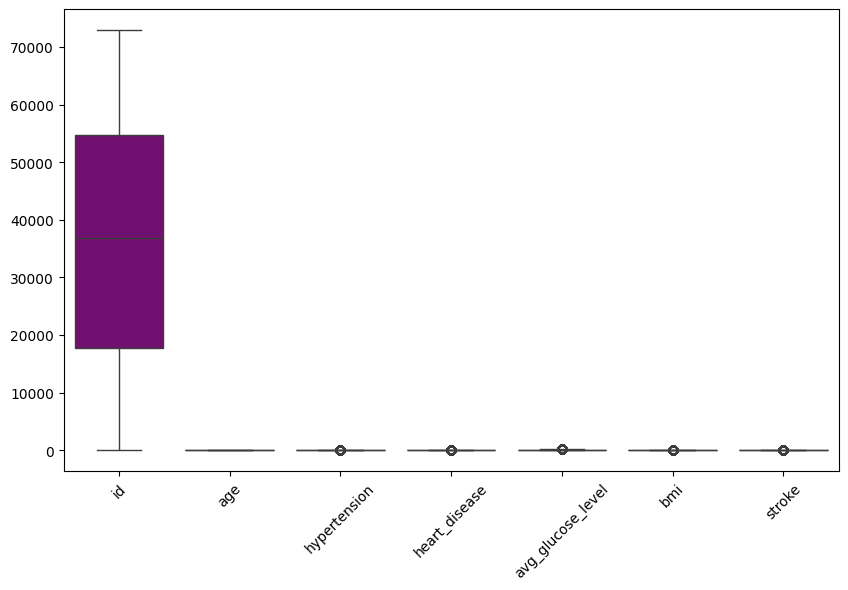

In [ ]:
#This code is used to plot the boxplots for the variables
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data = stroke_df,color = 'purple')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
#This code is used to print the outliers
Q1 = stroke_df['bmi'].quantile(0.25)
Q3 = stroke_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
da=(stroke_df['bmi'] < (Q1 - 1.5 * IQR)) | (stroke_df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
bmi,
False,4984
True,126


In [ ]:
#This code is used to fill the null values with median
stroke_df['bmi']=stroke_df['bmi'].fillna(stroke_df['bmi'].median())
stroke_df['bmi']

,bmi
0,36.6
1,28.1
2,32.5
3,34.4
4,24.0
...,...
5105,28.1
5106,40.0
5107,30.6
5108,25.6


In [ ]:
#This code is used to print the outliers
Q1 = stroke_df['avg_glucose_level'].quantile(0.25)
Q3 = stroke_df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(stroke_df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (stroke_df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
avg_glucose_level,
False,4483
True,627


In [ ]:
#This code is used to fill the null values with median
stroke_df['avg_glucose_level']=stroke_df['avg_glucose_level'].fillna(stroke_df['avg_glucose_level'].median())
stroke_df['avg_glucose_level']

,avg_glucose_level
0,228.69
1,202.21
2,105.92
3,171.23
4,174.12
...,...
5105,83.75
5106,125.20
5107,82.99
5108,166.29


In [ ]:
#This code is used to print the data types
stroke_df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


<Axes: xlabel='stroke', ylabel='count'>

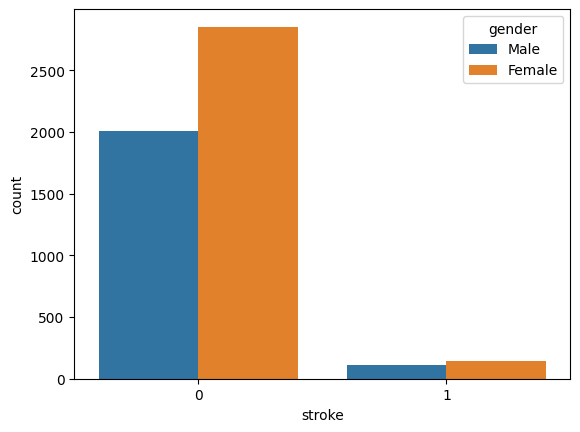

In [ ]:
#This code is used to print the count plot
sns.countplot(x='stroke', hue='gender', data=stroke_df)

<Axes: xlabel='stroke', ylabel='count'>

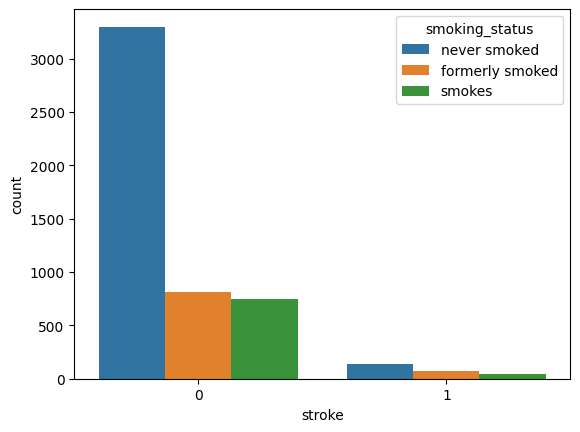

In [ ]:
#This code is used to print the count plot
sns.countplot(x='stroke', hue='smoking_status', data=stroke_df)

<Axes: xlabel='stroke', ylabel='count'>

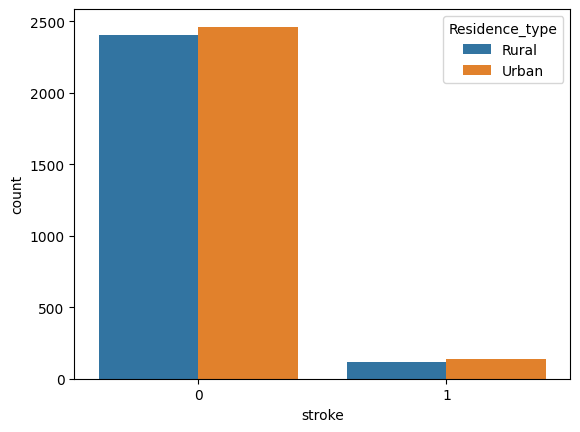

In [ ]:
#This code is used to print the count plot
sns.countplot(x='stroke', hue='Residence_type', data=stroke_df)

<Axes: xlabel='stroke', ylabel='count'>

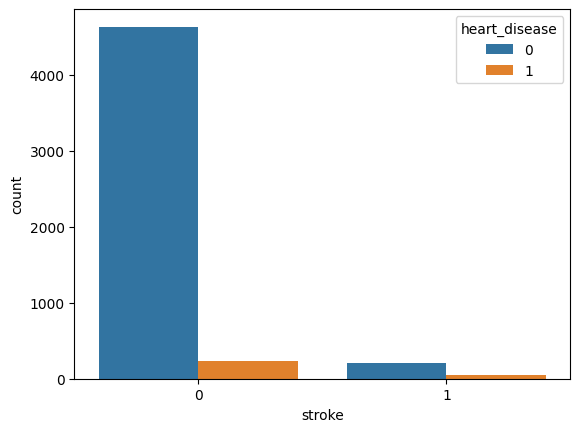

In [ ]:
#This code is used to print the count plot
sns.countplot(x='stroke', hue='heart_disease', data=stroke_df)

<Axes: xlabel='stroke', ylabel='count'>

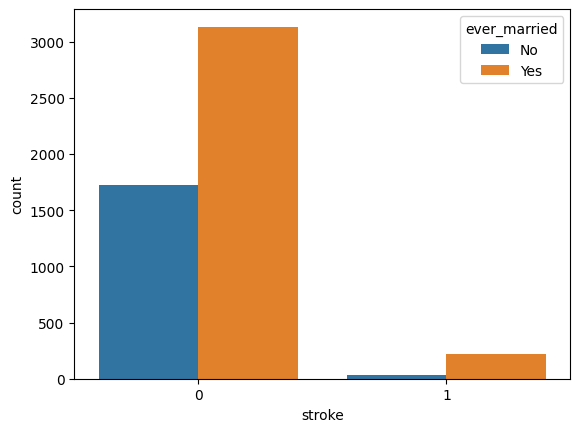

In [ ]:
#This code is used to print the count plot
sns.countplot(x='stroke', hue='ever_married', data=stroke_df)

In [ ]:
# Create a new 'employment_status' column based on 'work_type'
conditions = [
    stroke_df['work_type'].isin(['Children', 'Never_worked']),
    stroke_df['work_type'].isin(['Govt_job', 'Private', 'Self-employed'])
]
choices = ['unemployed', 'worked']
stroke_df['employment_status'] = np.select(conditions, choices, default='Other')

In [ ]:
# Check for non-numeric values in each column
for column in stroke_df.columns:
    if stroke_df[column].dtype == 'object':
        print(f"Column '{column}' contains non-numeric values.")

Column 'gender' contains non-numeric values.
Column 'ever_married' contains non-numeric values.
Column 'work_type' contains non-numeric values.
Column 'Residence_type' contains non-numeric values.
Column 'smoking_status' contains non-numeric values.


In [ ]:
#This code is used to convert categorical columns to binary
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each categorical column and convert it to numeric
categorical_columns = ['gender', 'ever_married', 'Residence_type', 'smoking_status', 'work_type', 'employment_status']
for column in categorical_columns:
    stroke_df[column] = label_encoder.fit_transform(stroke_df[column])

In [ ]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['work_type', 'work_status', 'employment_status']
stroke_df = stroke_df.drop(columns=columns_to_drop, errors='ignore')

# Display the updated DataFrame info to confirm columns are dropped
print(stroke_df.info())
print(stroke_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB
None
      id  gender   age  hypertension  heart_disease  ever_married  \
0   9046       1  67.0             0              1             1   
1  51676       0  61.0             0              0             1   
2  31

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


<Axes: >

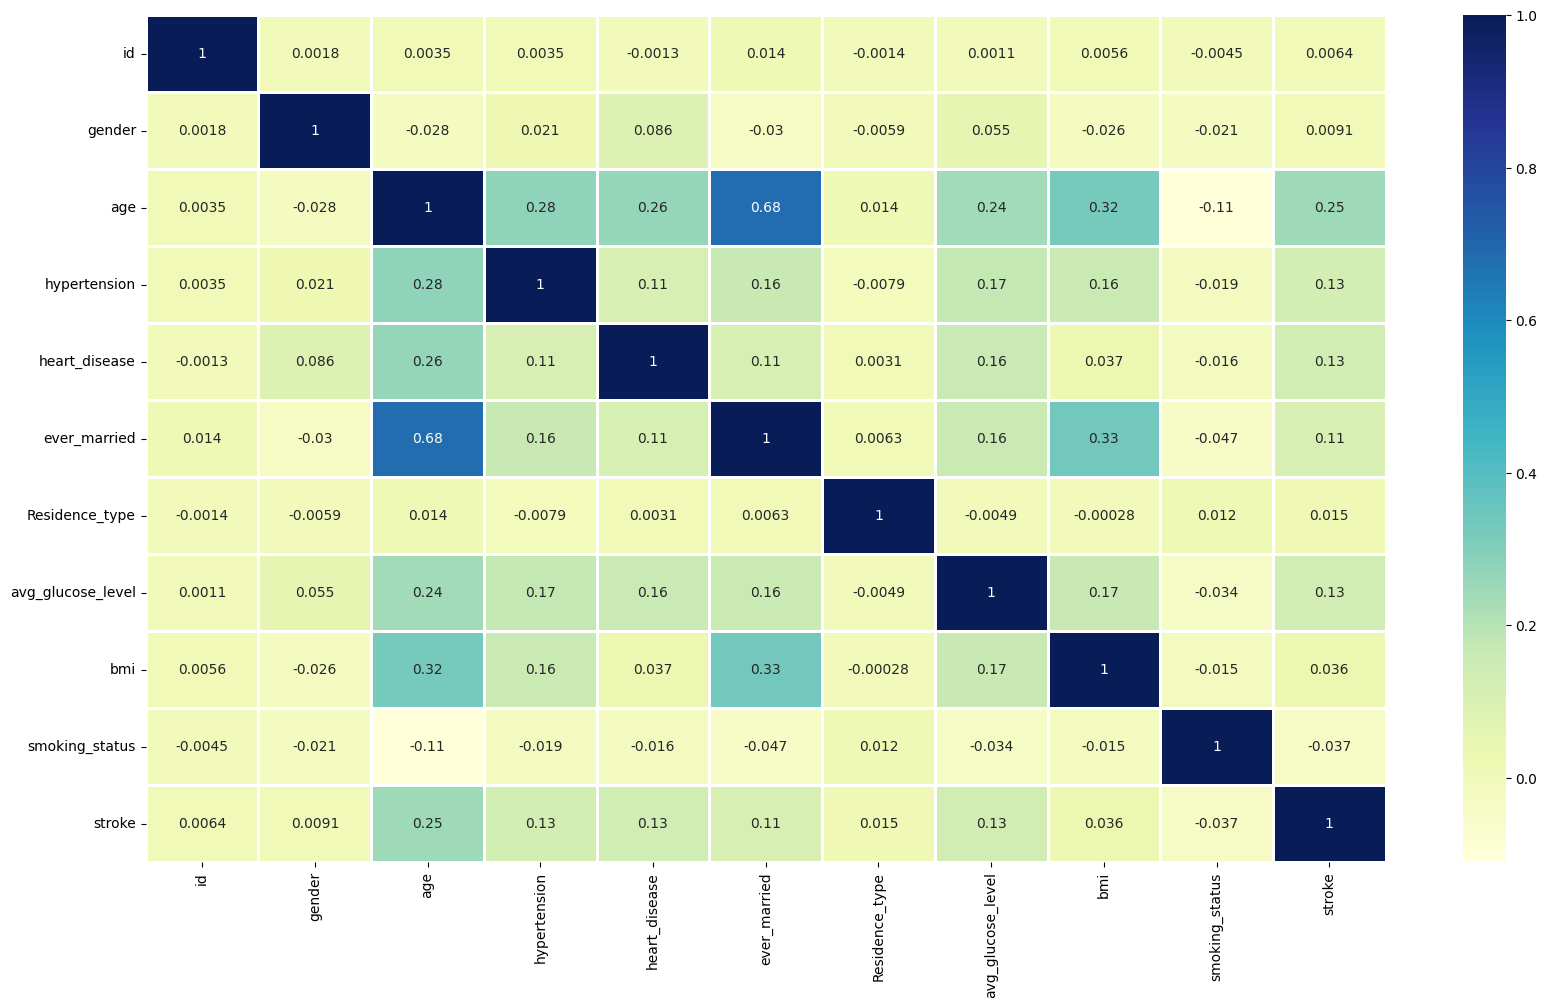

In [ ]:
#This code is used to print the correlation matrix
print(stroke_df.dtypes) # Added to diagnose column types
corr=stroke_df.corr()
f,ax=plt.subplots(figsize=(20,11))
sns.heatmap(corr,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

In [ ]:
#This code is used to print the top 5 rows
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,228.69,36.6,0,1
1,51676,0,61.0,0,0,1,0,202.21,28.1,1,1
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,1


In [ ]:
#This code is used for oversampling
import pandas as pd
import numpy as np

# Assuming df contains your dataset
X = stroke_df.drop(['stroke'], axis=1)
y = stroke_df['stroke']

# Separate majority and minority classes
df_majority = stroke_df[stroke_df['stroke'] == 0]
df_minority = stroke_df[stroke_df['stroke'] == 1]

# Upsample minority class
df_minority_upsampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Separate features and target variable
X_over = df_upsampled.drop(['stroke'], axis=1)
y_over = df_upsampled['stroke']

X_over
y_over

,stroke
249,0
250,0
251,0
252,0
253,0
...,...
178,1
174,1
238,1
3,1


In [ ]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
stroke_df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(stroke_df[['bmi', 'avg_glucose_level', 'age']])

In [ ]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [ ]:
# Checking the size of the splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 10)
y_train: (7777,)
X_test: (1945, 10)
y_test: (1945,)


In [ ]:
#This code is used to import operating systems
import os
graph_path = 'C:/Users/mo0354/windows_10_msbuild_Release_graphviz-9.0.0-win32/Graphviz/bin'
os.environ["PATH"] += os.pathsep + graph_path

In [ ]:
#This code is used to install datamining business analytics
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 80.6 MB/s eta 0:00:00


In [ ]:
from dmba import plotDecisionTree, classificationSummary, regressionSummary

Colab environment detected.


Accuracy: 0.7994858611825193
ROC AUC Score: 0.802280882141376


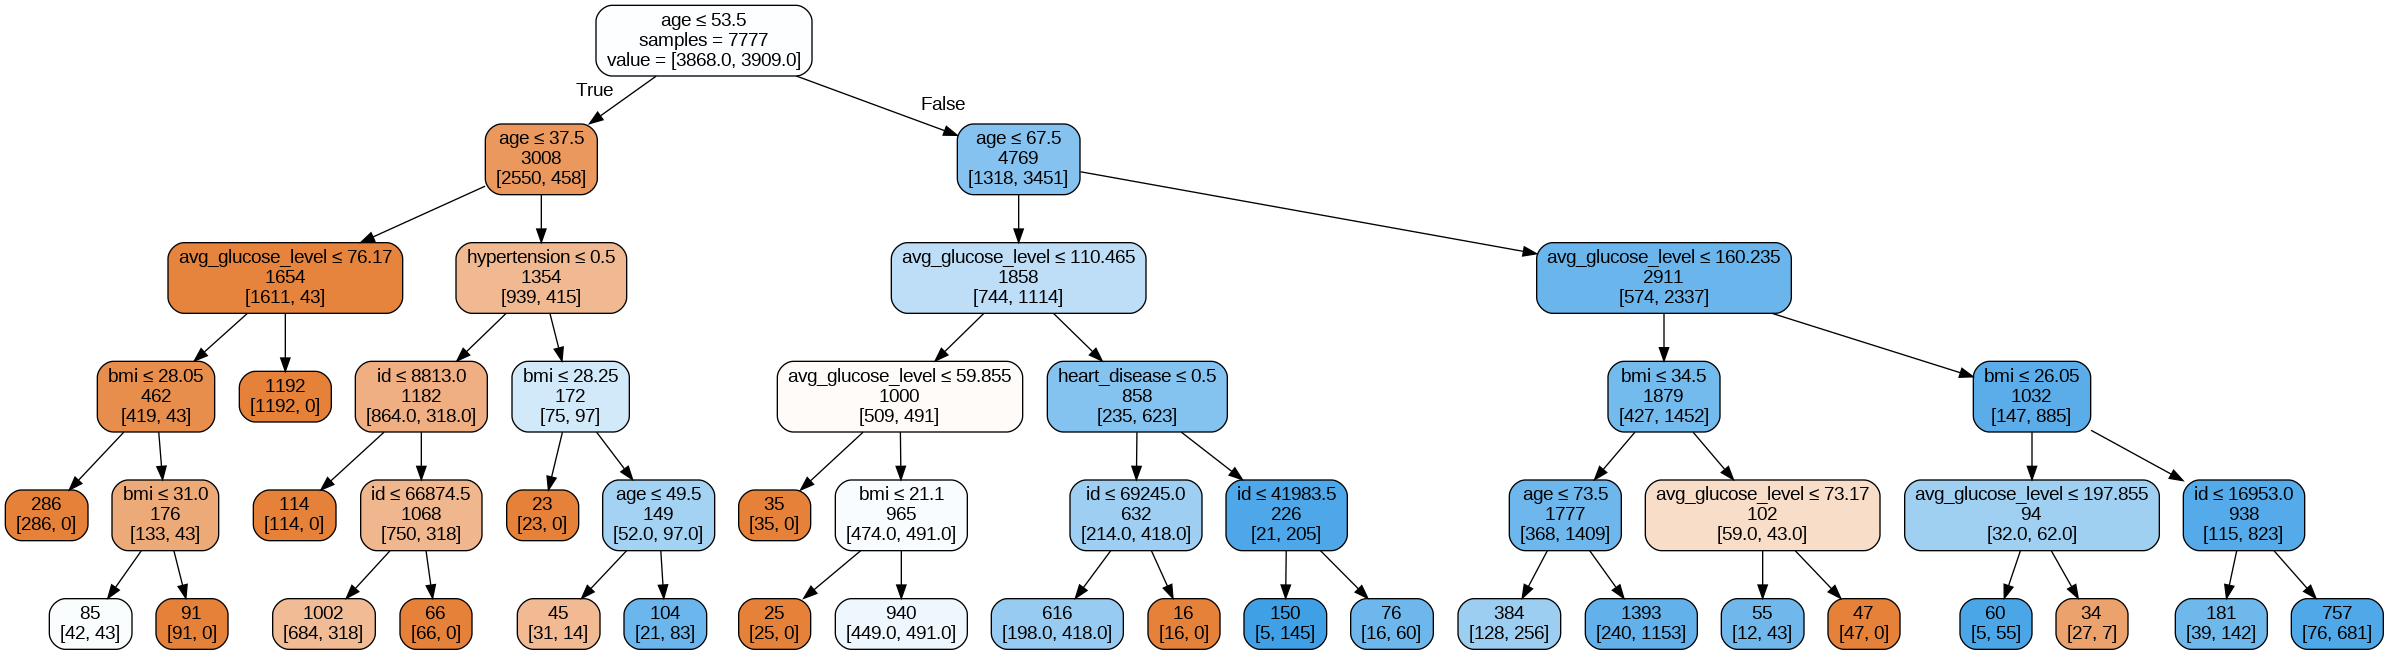

In [ ]:
#importing the Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier
# Libraries for calculating performance metrics
from sklearn import metrics
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
clf = DecisionTreeClassifier(criterion="entropy",random_state=1000,max_depth=5,min_samples_leaf=3)

# Training the classifier
clf = clf.fit(X_train,y_train)

#predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracyof the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))


plotDecisionTree(clf, feature_names=X_train.columns)

In [ ]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 0.9737789203084833
ROC AUC Score: 0.9743202416918428


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred_lr = classifier.predict(X_test)

confusion_matrix(y_test, y_pred_lr)
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

Accuracy: 0.7881748071979434


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes classifier
nb_clf = GaussianNB()

# Train the classifier
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.781491002570694


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
et_classifier = ExtraTreesClassifier(random_state=42)

# Train the classifier
et_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = et_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9979434447300771


In [ ]:
id_val=1 # Add a placeholder for id
gender=1
age=75
hypertension=1
heart_disease=1
ever_married=1
Residence_type=1
avg_glucose_level=300
bmi=36.6
smoking_status=1

input_features = [id_val, gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status]

features_value = [np.array(input_features)]
features_name = ['id', 'gender','age','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','smoking_status']

df = pd.DataFrame(features_value, columns=features_name)
prediction = knn.predict(df)[0]
print(prediction)

0


Confusion Matrix:
               False Negative  False Positive
True Negative             849             144
True Positive               0             952


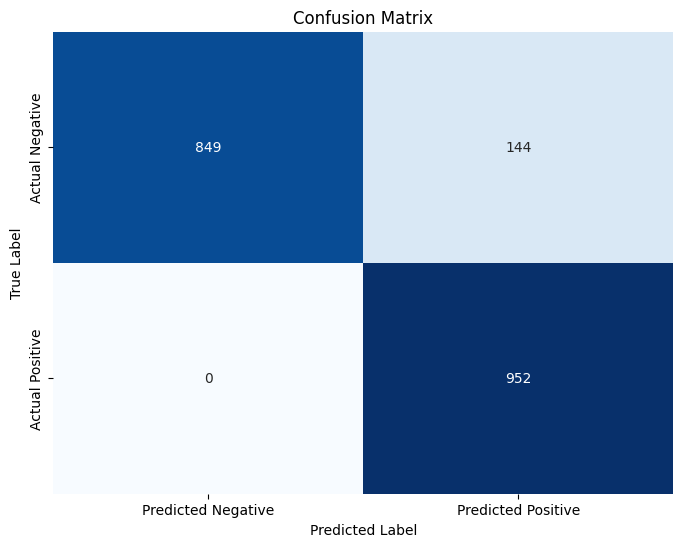

In [ ]:
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to DataFrame for visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'], columns=['False Negative', 'False Positive'])

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
knn_classifier = KNeighborsClassifier()

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       993
           1       0.87      1.00      0.93       952

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.94      0.93      0.93      1945

